In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.drop(columns = ["User ID" ,"Gender"] , inplace = True)

In [5]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [7]:
X


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
import sklearn

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 20)

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential


In [16]:
model = Sequential()
model.add(Dense(128, activation = 'relu' , input_dim = 2))
model.add(Dense(1 , activation = 'sigmoid'))

C:\Users\Parveen\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss = 'binary_crossentropy' , optimizer  = "Adam" , metrics = ['accuracy'])

In [20]:
history = model.fit(X_train , y_train , validation_data = (X_test , y_test) , epochs = 100)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4810 - loss: 227.9767 - val_accuracy: 0.5625 - val_loss: 34.6194
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5650 - loss: 35.9367 - val_accuracy: 0.4375 - val_loss: 23.2757
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4754 - loss: 40.6305 - val_accuracy: 0.5625 - val_loss: 65.9083
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6198 - loss: 40.6676 - val_accuracy: 0.4375 - val_loss: 72.2913
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4834 - loss: 72.8328 - val_accuracy: 0.4375 - val_loss: 15.7065
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5228 - loss: 99.6714 - val_accuracy: 0.5625 - val_loss: 116.3037
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5928 - loss: 121.4759 - val_accuracy: 0.4375 - val_loss: 27.2777
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6082 - loss: 156.1045 - val_

Epoch 51/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5271 - loss: 80.4303 - val_accuracy: 0.5625 - val_loss: 154.9958
Epoch 52/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4922 - loss: 153.0726 - val_accuracy: 0.5625 - val_loss: 317.1539
Epoch 53/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5600 - loss: 167.6761 - val_accuracy: 0.5625 - val_loss: 161.9428
Epoch 54/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6304 - loss: 65.2753 - val_accuracy: 0.5625 - val_loss: 42.7832
Epoch 55/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5036 - loss: 59.5509 - val_accuracy: 0.4375 - val_loss: 4.2304
Epoch 56/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5536 - loss: 85.6124 - val_accuracy: 0.5625 - val_loss: 4.6283
Epoch 57/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5449 - loss: 13.9915 - val_accuracy: 0.4375 - val_loss: 8.3425
Epoch 58/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4834 - loss: 37.6145 -

Text(0.5, 1.0, 'Before Data Scaling')

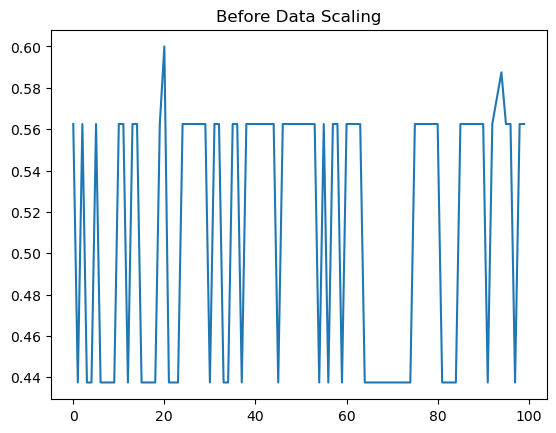

In [23]:
plt.plot(history.history['val_accuracy'])
plt.title("Before Data Scaling")

In [24]:
# Applying Scaling
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()

In [38]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [39]:
model = Sequential()
model.add(Dense(128, activation = 'relu' , input_dim = 2))
model.add(Dense(1 , activation = 'sigmoid'))

C:\Users\Parveen\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss = 'binary_crossentropy' , optimizer = "Adam" , metrics = ['accuracy'])

In [42]:
history = model.fit(X_train_scaled,y_train,validation_data = (X_test_scaled , y_test) ,epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7309 - loss: 0.6612 - val_accuracy: 0.6250 - val_loss: 0.6618
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7338 - loss: 0.6060 - val_accuracy: 0.7375 - val_loss: 0.6006
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8097 - loss: 0.5542 - val_accuracy: 0.8125 - val_loss: 0.5492
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8005 - loss: 0.5234 - val_accuracy: 0.8875 - val_loss: 0.5055
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8404 - loss: 0.4730 - val_accuracy: 0.9000 - val_loss: 0.4685
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7944 - loss: 0.4711 - val_accuracy: 0.9000 - val_loss: 0.4392
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8196 - loss: 0.4395 - val_accuracy: 0.8875 - val_loss: 0.4133
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8487 - loss: 0.4018 - val_accuracy: 0.8875 - 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9273 - loss: 0.2242 - val_accuracy: 0.9375 - val_loss: 0.2200
Epoch 52/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9195 - loss: 0.2286 - val_accuracy: 0.9375 - val_loss: 0.2203
Epoch 53/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9228 - loss: 0.2155 - val_accuracy: 0.9375 - val_loss: 0.2205
Epoch 54/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8949 - loss: 0.2727 - val_accuracy: 0.9375 - val_loss: 0.2223
Epoch 55/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9013 - loss: 0.2595 - val_accuracy: 0.9250 - val_loss: 0.2238
Epoch 56/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9095 - loss: 0.2154 - val_accuracy: 0.9375 - val_loss: 0.2193
Epoch 57/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8998 - loss: 0.2591 - val_accuracy: 0.9250 - val_loss: 0.2208
Epoch 58/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8990 - loss: 0.2735 - val_accuracy: 0.9250 - val_lo

Text(0.5, 1.0, 'After Data Scaling')

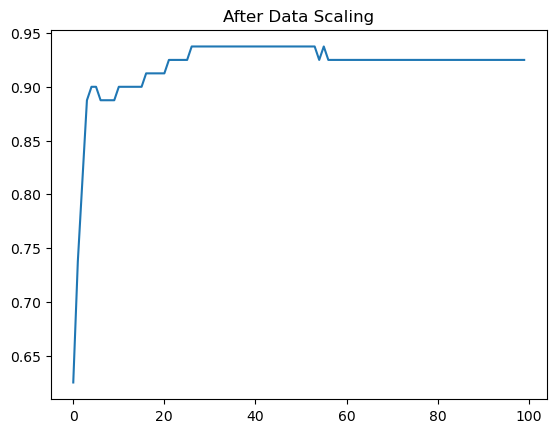

In [44]:
plt.plot(history.history['val_accuracy'])
plt.title("After Data Scaling")